In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Data For Prediction.csv")


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
train=df.drop(
    [
#    'year',
  'certificate',
#     'movie', 

    'genre', 
   'rate',
    'metascore', 
     'votes',
#      'gross', 
     'user_reviews',
     'critic_reviews',
     'popularity', 
     'awards_wins',
     'awards_nominations',
 'Oscar_Best_Picture_won',
'Oscar_Best_Picture_nominated', 
    'Oscar_Best_Director_won',
      
#    'Oscar_Best_Director_nominated',
    'Oscar_Best_Actor_won',
#     'Oscar_Best_Actor_nominated', 
    'Oscar_Best_Actress_won',
#    'Oscar_Best_Actress_nominated',
   'other_bestPicture_won',
     'other_director_won', 
    'other_actor_won', 
   'other_actress_won',
    'other_bestPicture_nominated', 
     'other_director_nominated',
       'other_actor_nominated',
#     'other_actress_nominated'
    ],
     
     
     
     
     
    axis=1)

In [5]:
train=df.drop(
    [
  
        #'year',
  'certificate',
    #'movie', 

    'genre', 
   'rate',
    'metascore', 
     'votes',
 #    'gross', 
     'user_reviews',
     'critic_reviews',
     'popularity', 
  #   'awards_wins',
     'awards_nominations',
 'Oscar_Best_Picture_won',
#'Oscar_Best_Picture_nominated', 
    'Oscar_Best_Director_won',
      
   #'Oscar_Best_Director_nominated',
    'Oscar_Best_Actor_won',
    #'Oscar_Best_Actor_nominated', 
    'Oscar_Best_Actress_won',
   #'Oscar_Best_Actress_nominated',
   'other_bestPicture_won',
     'other_director_won', 
    'other_actor_won', 
   'other_actress_won',
    'other_bestPicture_nominated', 
     'other_director_nominated',
       'other_actor_nominated',
 #   'other_actress_nominated'
    ],
     
     
     
     
     
    axis=1)

In [6]:
test=pd.DataFrame()

In [7]:
test['Oscar_Best_Actress_won']=df['Oscar_Best_Actress_won']


In [8]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
for i in train.index:
    if(int(train['year'][i])<2017):

        X_train.append(train.iloc[i])
        Y_train.append(test['Oscar_Best_Actress_won'][i])
    else:
        X_test.append(train.iloc[i])
        Y_test.append(test['Oscar_Best_Actress_won'][i])
        

In [9]:
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)
X_test=pd.DataFrame(X_test)
Y_test=pd.DataFrame(Y_test)

In [10]:
movie=X_test['movie']

X_train=X_train.drop(['movie'],axis=1)
X_test=X_test.drop(['movie'],axis=1)

In [11]:
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())
Y_train=(Y_train-Y_train.min())/(Y_train.max()-Y_train.min())
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())
Y_test=(Y_test-Y_test.min())/(Y_test.max()-Y_test.min())

In [12]:
X_train=X_train.drop(['year'],axis=1)
X_test=X_test.drop(['year'],axis=1)

In [13]:
regr=LinearRegression()
regr.fit(X_train,Y_train)
pred=regr.predict(X_test)
print(regr.score(X_test,Y_test))
df_norm=pd.DataFrame(pred)
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())


0.14429913828661045


In [14]:
df_norm.sort_values(by=[0],ascending=False).head(5)

,0
23,1.000000
15,0.863927
17,0.816711
22,0.603598
29,0.547240


In [15]:
indexList=df_norm.sort_values(by=[0],ascending=False).head(5).index.to_list()
sort=df_norm.sort_values(by=[0],ascending=False).head(5)
movie=pd.DataFrame(movie.values)

deno=0
for i in indexList:
    deno+=np.exp(sort[0][i])
for i in indexList:
    print(movie[0][i],np.exp(sort[0][i])/deno,sep=':')

The Shape of Water:0.24913345627228115
Lady Bird:0.21743843638399737
Three Billboards Outside Ebbing, Missouri:0.20741035872494742
I, Tonya:0.16760102597556908
The Post:0.158416722643205


In [31]:
Y_test.iloc[17]

0    1.0
Name: 17, dtype: float64

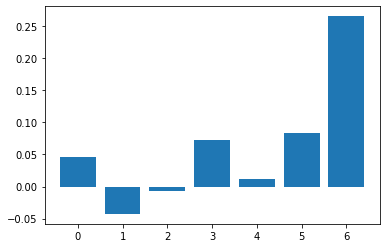

In [44]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.coef_
# summarize feature importance
a=importance[0]
a=sorted(a,reverse=True)

b=importance[0]
c=[col for col in X_train.columns]
dic=dict()
for i,v in enumerate(b):
    if(v>=0):
        dic[c[i]]=v
a={k:v for k,v in sorted(dic.items(),reverse=True,key= lambda item:item[1])}

# plot feature importance
pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [46]:
a


{'other_actress_nominated': 0.26484455113112837,
 'Oscar_Best_Actress_nominated': 0.0826462357219167,
 'Oscar_Best_Director_nominated': 0.0727836298457089,
 'gross': 0.04556713385532936,
 'Oscar_Best_Actor_nominated': 0.011346452813639565}

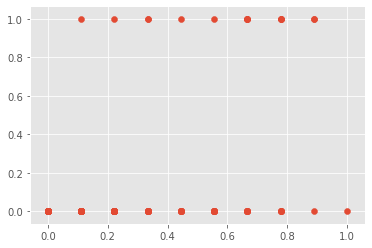

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
x=X_train['other_actress_nominated']
y=Y_train[0]
plt.scatter(x,y)
plt.show()

In [53]:
a

{'other_actress_nominated': 0.26484455113112837,
 'Oscar_Best_Actress_nominated': 0.0826462357219167,
 'Oscar_Best_Director_nominated': 0.0727836298457089,
 'gross': 0.04556713385532936,
 'Oscar_Best_Actor_nominated': 0.011346452813639565}

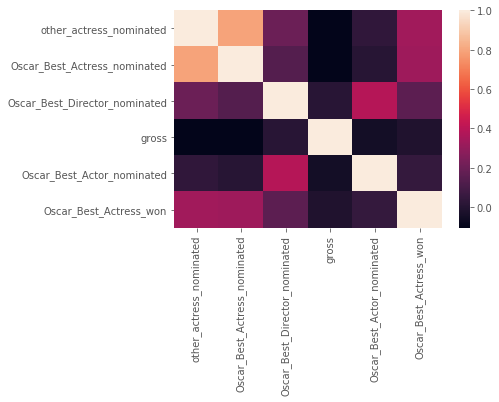

In [54]:
corrDf=pd.DataFrame()
corrDf['other_actress_nominated']=X_train['other_actress_nominated']
corrDf['Oscar_Best_Actress_nominated']=X_train['Oscar_Best_Actress_nominated']
corrDf['Oscar_Best_Director_nominated']=X_train['Oscar_Best_Director_nominated']
corrDf['gross']=X_train['gross']
corrDf['Oscar_Best_Actor_nominated']=X_train['Oscar_Best_Actor_nominated']

corrDf['Oscar_Best_Actress_won']=Y_train[0]
sns.heatmap(corrDf.corr());